In [1]:
import random
import numpy as np
import matplotlib as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# `Conv2D` is for images while `Conv3D` is for videos 
# fully connected layer is called `Dense` layer that's why we imported it 
# `Flatted` is doing transfer multidimension vector into single dimentsion vector

## Load Dataset

In [2]:
x_train = np.loadtxt("C:\\Users\\zeyad\\Desktop\\a7a\\Image Classification CNN Keras Dataset\\input.csv",delimiter = ',')
y_train = np.loadtxt("C:\\Users\\zeyad\\Desktop\\a7a\\Image Classification CNN Keras Dataset\\labels.csv",delimiter = ',')
x_test = np.loadtxt("C:\\Users\\zeyad\\Desktop\\a7a\\Image Classification CNN Keras Dataset\\input_test.csv",delimiter = ',')
y_test = np.loadtxt("C:\\Users\\zeyad\\Desktop\\a7a\\Image Classification CNN Keras Dataset\\labels_test.csv",delimiter = ',')


In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)
# reshaping to become in the normal size of image
x_train = x_train/255.0
x_test = x_test/255.0
# rescaling to become from 0 to 1;

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


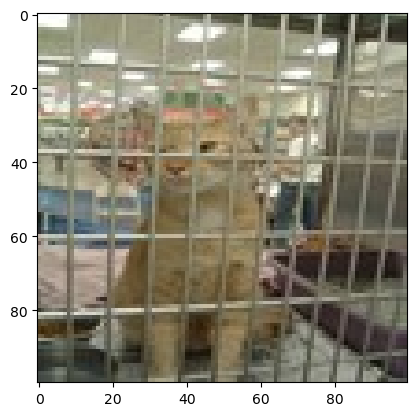

In [5]:
import random
import matplotlib.pyplot as plt
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()
## first we are doing random for selecting random images from the data set 
## and we choose len(x_train) to select row ( which mean image for dog or cat)
## then we use build in function which is imshow()to selecct the row we choose and give all the column
# and display it 

## Model

In [6]:
# sequential model means that the layer are going to be stacked up in sequance 
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
# adding cost function and backpropagation 
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs =5 , batch_size = 64)

Epoch 1/5
32/32 [==============================] - 5s 134ms/step - loss: 0.7299 - accuracy: 0.4875
Epoch 2/5
32/32 [==============================] - 3s 100ms/step - loss: 0.6870 - accuracy: 0.5600
Epoch 3/5
32/32 [==============================] - 3s 93ms/step - loss: 0.6643 - accuracy: 0.6050
Epoch 4/5
32/32 [==============================] - 3s 92ms/step - loss: 0.6158 - accuracy: 0.6705
Epoch 5/5
32/32 [==============================] - 3s 90ms/step - loss: 0.5947 - accuracy: 0.6920


In [9]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 48ms/step - loss: 0.6544 - accuracy: 0.6100


[0.6544248461723328, 0.6100000143051147]

## make predictions

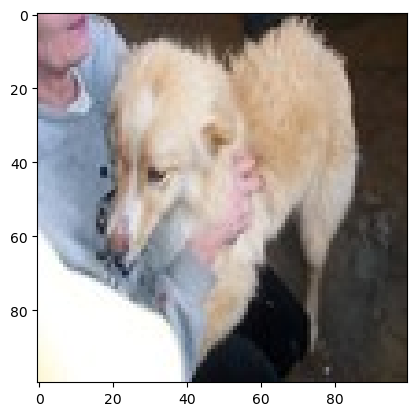

1/1 [==============================] - 0s 23ms/step
Our model says it is a : dog


In [16]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
# # don't forget to reshape 

# class 0 is dog and 1 is cat
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [11]:
from tensorflow.keras.preprocessing import image

In [12]:
img = image.load_img("C:\\Users\\zeyad\\Desktop\\image\\cat.png")

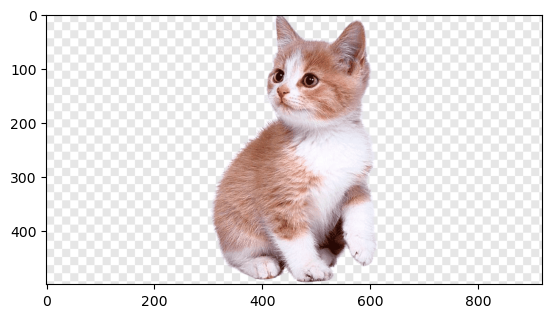

In [40]:
plt.imshow(img)

In [43]:
y_pred = model.predict(img.reshape(1,100,100,3))
# # don't forget to reshape 

# class 0 is dog and 1 is cat
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

AttributeError: 'Image' object has no attribute 'reshape'

1/1 [==============================] - 0s 14ms/step
Our model says it is a: dog


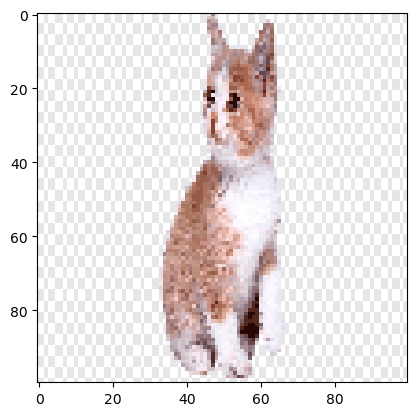

In [46]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the image using Keras image.load_img
img = image.load_img("C:\\Users\\zeyad\\Desktop\\image\\cat.png", target_size=(100, 100))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape expected by the model
img_array = img_array.reshape(1, 100, 100, 3)

# Preprocess the image
img_array = preprocess_input(img_array)

# Make the prediction
y_pred = model.predict(img_array)

# Class 0 is dog and 1 is cat
if y_pred > 0.5:
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a:", pred)
plt.imshow(img)
